#### Linear Regression on the life expectancy of U.S. adults

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt

In [2]:
# load the data
flc = '/Users/pinqingkan/Desktop/DataScience/PythonDataScience/DAT210x-master/Module5/Datasets/'
fname = flc + 'life_expectancy.csv'
X = pd.read_csv(fname, sep = '\t')

In [3]:
X.describe()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1991.250000,72.730000,78.592500,65.912500,73.262500
std,20.536085,4.968681,5.200561,6.422284,7.157592
min,1900.000000,46.600000,48.700000,32.500000,33.500000
25%,1984.750000,71.800000,78.700000,64.575000,73.400000
50%,1994.500000,73.350000,79.650000,65.250000,73.900000
75%,2004.250000,75.500000,80.500000,69.425000,76.125000
max,2014.000000,76.700000,81.400000,72.500000,78.400000


                 Year  WhiteMale  WhiteFemale  BlackMale  BlackFemale
Year         1.000000   0.974154     0.913907   0.960635     0.940429
WhiteMale    0.974154   1.000000     0.975164   0.987974     0.985009
WhiteFemale  0.913907   0.975164     1.000000   0.956689     0.994656
BlackMale    0.960635   0.987974     0.956689   1.000000     0.975922
BlackFemale  0.940429   0.985009     0.994656   0.975922     1.000000


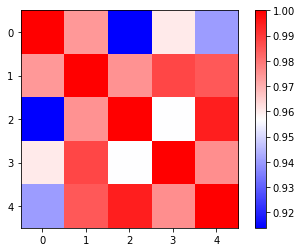

In [4]:
# check the independency of the data entries
cor = X.corr()
print(cor)
plt.imshow(cor, cmap = 'bwr')
plt.colorbar()
plt.show()

In [5]:
# slice the data for linear regression: white male, life expectancy
indices = X.Year[X.Year < 1986].index
X_train = X.loc[indices, ['Year']]
Y_train = X.loc[indices, ['WhiteMale']]

In [6]:
# slice the data for linear regression: black female, life expectancy
Y_train2 = X.loc[indices, ['BlackFemale']]

In [7]:
# linear regression on the white male data
model = LR(fit_intercept = True)
model.fit(X_train, Y_train)
Y_WM = model.predict(X_train)

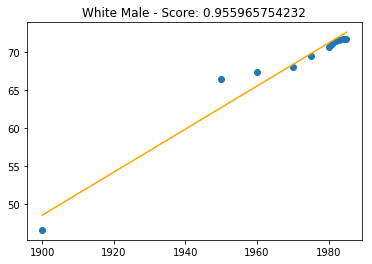

In [8]:
# view the results
plt.figure()
plt.scatter(X_train, Y_train, marker = 'o')
plt.plot(X_train, Y_WM, color = 'orange')
fttl = 'White Male - Score: ' + str(model.score(X_train, Y_train))
plt.title(fttl)
plt.show()

In [9]:
# test the prediction
iyear = 2014
year_WM = model.predict([[iyear]])
year = X.WhiteMale[X.Year == iyear].values
print('Est. Life ', iyear, ': ', year_WM[0][0])
print('Act. Life ', iyear, ': ', year[0])

Est. Life  2014 :  80.8563542562
Act. Life  2014 :  76.7


In [10]:
# linear regression on the black female data
model = LR(fit_intercept = True)
model.fit(X_train, Y_train2)
Y_BF = model.predict(X_train)

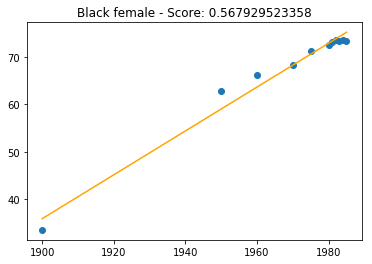

In [11]:
# view the results
plt.figure()
plt.scatter(X_train, Y_train2, marker = 'o')
plt.plot(X_train, Y_BF, color = 'orange')
fttl = 'Black female - Score: ' + str(model.score(X_train, Y_train))
plt.title(fttl)
plt.show()

In [12]:
# test the prediction
iyear = 2014
year_BF = model.predict([[iyear]])
year = X.BlackFemale[X.Year == iyear].values
print('Est. Life ', iyear, ': ', year_BF[0][0])
print('Act. Life ', iyear, ': ', year[0])

Est. Life  2014 :  88.6988993981
Act. Life  2014 :  78.4
